Text(0,0.5,'Testing Error')

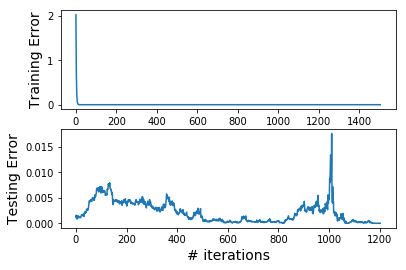

In [77]:
# 1 day ahead Exchange Rate Prediction model for USD to INR
import csv
import numpy as np
from operator import add
import matplotlib.pyplot as plt
from collections import defaultdict

filename = 'USD_INR_Historical_Data.csv'

price = [] # each value in each column is appended to a list

with open(filename) as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            if k == 'Price':
                price.append(float(v)) # append the value into the appropriate list
                                 # based on column name k

def normalize():
    mx = max(price)
    for i in range(0, len(price)):
        price[i] = price[i] / mx
normalize()       

training = []
testing = []

for idx in range(int(0.2 * len(price)), len(price)):
    temp = []
    temp.append(price[idx])
    temp.append(np.mean(price[idx - int(0.2 * len(price)): idx]))
    temp.append(np.var(price[idx - int(0.2 * len(price)): idx]))
    
    training.append(temp)
    
testing = training[:int(0.2 * len(training))]
testing = training[int(0.2 * len(training)):]
               
#---------------------- Initialization --------------------------
mu = 0.07
# Initializing random weights between (0, 1)
predicted_weights = np.random.randn(3)
errors = []

# Training
#---------------------- LMS Algorithm ---------------------------
for index in range(0, len(training)-1):
    x = training[index]
    predicted_output = np.multiply(x, predicted_weights)
    actual_output = training[index+1][0]
    
    d = np.sum(actual_output)
    e = np.sum(predicted_output)    
    
    errors.append(abs(d - e) * abs(d - e))
    
    x = [2.0 * i * mu * (d - e) for i in x]
    
    predicted_weights = list( map(add, predicted_weights, x))

plt.subplot(2, 1, 1)
plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Training Error', fontsize=14, color='black')  

errors = []

# Testing
for index in range(0, len(testing)-1):
    x = training[index]
    predicted_output = np.multiply(x, predicted_weights)
    actual_output = training[index+1][0]
    
    d = np.sum(actual_output)
    e = np.sum(predicted_output)
    
    errors.append(abs(d - e) * abs(d - e))

plt.subplot(2, 1, 2)
plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Testing Error', fontsize=14, color='black')     

In [ ]:
# 1 day ahead Exchange Rate Prediction model for USD to GBP
import csv
import numpy as np
from operator import add
import matplotlib.pyplot as plt
from collections import defaultdict

filename = 'USD_INR_Historical_Data.csv'

price = [] # each value in each column is appended to a list

with open(filename) as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            if k == 'Price':
                price.append(float(v)) # append the value into the appropriate list
                                 # based on column name k

def normalize():
    mx = max(price)
    for i in range(0, len(price)):
        price[i] = price[i] / mx
normalize()       

training = []
testing = []

for idx in range(int(0.2 * len(price)), len(price)):
    temp = []
    temp.append(price[idx])
    temp.append(np.mean(price[idx - int(0.2 * len(price)): idx]))
    temp.append(np.var(price[idx - int(0.2 * len(price)): idx]))
    
    training.append(temp)
    
testing = training[:int(0.2 * len(training))]
testing = training[int(0.2 * len(training)):]
               
#---------------------- Initialization --------------------------
mu = 0.07
# Initializing random weights between (0, 1)
predicted_weights = np.random.randn(3)
errors = []

# Training
#---------------------- LMS Algorithm ---------------------------
for index in range(0, len(training)-1):
    x = training[index]
    predicted_output = np.multiply(x, predicted_weights)
    actual_output = training[index+1][0]
    
    d = np.sum(actual_output)
    e = np.sum(predicted_output)    
    
    errors.append(abs(d - e) * abs(d - e))
    
    x = [2.0 * i * mu * (d - e) for i in x]
    
    predicted_weights = list( map(add, predicted_weights, x))

plt.subplot(2, 1, 1)
plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Training Error', fontsize=14, color='black')  

errors = []

# Testing
for index in range(0, len(testing)-1):
    x = training[index]
    predicted_output = np.multiply(x, predicted_weights)
    actual_output = training[index+1][0]
    
    d = np.sum(actual_output)
    e = np.sum(predicted_output)
    
    errors.append(abs(d - e) * abs(d - e))

plt.subplot(2, 1, 2)
plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Testing Error', fontsize=14, color='black')     